<a href="https://colab.research.google.com/github/hm37-blip/plant-seedling-classification-di-mono/blob/main/CV_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
from PIL import Image

test_dir = 'raw_data/test'
submission = []

model.eval()

class_names = full_dataset.classes
print(f"the model type and exp: {full_dataset.class_to_idx}")

test_files = os.listdir(test_dir)
test_files = [f for f in test_files if f.endswith(('.png', '.jpg', '.jpeg'))]
from tqdm import tqdm
loop = tqdm(test_files, desc='Predicting')
with torch.no_grad():
    for filename in loop:
        filepath = os.path.join(test_dir, filename)
        image = Image.open(filepath).convert('RGB')
        image_tensor = val_transform(image).unsqueeze(0)
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs, 1)
        predicted_class = class_names[predicted.item()]
        submission.append({'file': filename, 'species': predicted_class})

#output
df = pd.DataFrame(submission)
df.to_csv('my_submission.csv', index=False)

print(f"sucessfuly predicted {len(df)} images")
print("saved the file as 'my_submission.csv'")

the model type and exp: {'dicots': 0, 'monocots': 1}


Predicting: 100%|██████████| 794/794 [00:07<00:00, 100.70it/s]

sucessfuly predicted 794 images
saved the file as 'my_submission.csv'


In [ ]:
import os
import pandas as pd
from PIL import Image

test_dir = 'raw_data/test'
submission = []

model.eval()

class_names = full_dataset.classes
print(f"the model type and exp: {full_dataset.class_to_idx}")

test_files = os.listdir(test_dir)
test_files = [f for f in test_files if f.endswith(('.png', '.jpg', '.jpeg'))]
from tqdm import tqdm
loop = tqdm(test_files, desc='Predicting')
with torch.no_grad():
    for filename in loop:
        filepath = os.path.join(test_dir, filename)
        image = Image.open(filepath).convert('RGB')
        image_tensor = val_transform(image).unsqueeze(0)
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs, 1)
        predicted_class = class_names[predicted.item()]
        submission.append({'file': filename, 'species': predicted_class})

#output
df = pd.DataFrame(submission)
df.to_csv('my_submission.csv', index=False)

print(f"sucessfuly predicted {len(df)} images")
print("saved the file as 'my_submission.csv'")

the model type and exp: {'dicots': 0, 'monocots': 1}


Predicting: 100%|██████████| 794/794 [00:07<00:00, 100.70it/s]

sucessfuly predicted 794 images
saved the file as 'my_submission.csv'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.9.0+cu126
0.24.0+cu126


In [ ]:
# kaggle API token KGAT_3d33f17bad9c0b8a60b0116a5d53af5f
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c plant-seedlings-classification
!unzip -q plant-seedlings-classification.zip -d raw_data
print("downloading finished!")
!unzip -o -q plant-seedlings-classification.zip -d raw_data

100% 1.68G/1.69G [00:12<00:00, 114MB/s] 
100% 1.69G/1.69G [00:12<00:00, 148MB/s]
downloading finished!


In [ ]:
import os
import shutil
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
#clean up exsited dataset
if os.path.exists('dataset'):
    shutil.rmtree('dataset')
if os.path.exists('raw_data'):
    shutil.rmtree('raw_data')
#
if not os.path.exists('plant-seedlings-classification.zip'):
    !kaggle competitions download -c plant-seedlings-classification

!unzip -q plant-seedlings-classification.zip -d raw_data

monocots_list = ['Black-grass', 'Common wheat', 'Loose Silky-bent', 'Maize']
base_dir = 'dataset'
source_dir = 'raw_data/train'

os.makedirs(f'{base_dir}/monocots', exist_ok=True)
os.makedirs(f'{base_dir}/dicots', exist_ok=True)

if os.path.exists(source_dir):
    for plant_name in os.listdir(source_dir):
        source_folder = os.path.join(source_dir, plant_name)
        if os.path.isdir(source_folder):
            if plant_name in monocots_list:
                target_folder = f'{base_dir}/monocots/{plant_name}'
            else:
                target_folder = f'{base_dir}/dicots/{plant_name}'
            shutil.move(source_folder, target_folder)
else:
    print("something goes wrong")

num_monocots = 0
for root, dirs, files in os.walk(f'{base_dir}/monocots'):
    num_monocots += len(files)

print(f"monocot has {num_monocots} images")

if num_monocots > 0:
    print("dir is ready")

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    full_dataset = datasets.ImageFolder(root='dataset/', transform=transform)
    print(f"we find: {full_dataset.classes} exsist")
else:
    print("the dir is empty")


monocot has 1359 images
dir is ready
we find: ['dicots', 'monocots'] exsist


In [ ]:
import os
import shutil
from torchvision import datasets

if os.path.exists('dataset'):
    shutil.rmtree('dataset')
if os.path.exists('raw_data'):
    shutil.rmtree('raw_data')

if not os.path.exists('plant-seedlings-classification.zip'):
    print("no file found")
    !kaggle competitions download -c plant-seedlings-classification

!unzip -o -q plant-seedlings-classification.zip -d raw_data

monocots_list = ['Black-grass', 'Common wheat', 'Loose Silky-bent', 'Maize']
base_dir = 'dataset'
source_dir = 'raw_data/train'

if not os.path.exists(source_dir):
    source_dir = 'raw_data'

os.makedirs(f'{base_dir}/monocots', exist_ok=True)
os.makedirs(f'{base_dir}/dicots', exist_ok=True)

moved_count = 0

for plant_name in os.listdir(source_dir):
    source_folder = os.path.join(source_dir, plant_name)
    if os.path.isdir(source_folder) and plant_name != 'train':

        if plant_name in monocots_list:
            target_folder = f'{base_dir}/monocots/{plant_name}'
        else:
            target_folder = f'{base_dir}/dicots/{plant_name}'

        shutil.move(source_folder, target_folder)
        moved_count += 1

def count_files(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count

num_mono = count_files(f'{base_dir}/monocots')
num_di = count_files(f'{base_dir}/dicots')

print(f"  - momocot folder has : {num_mono} images")
print(f"  - dicot folder has: {num_di} images")

if num_mono > 0 and num_di > 0:
    print("it worked")
else:
    print("it does not work")

  - momocot folder has : 1359 images
  - dicot folder has: 3391 images
it worked


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

#set up transform for test set
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# transform for validation
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

full_dataset = datasets.ImageFolder(root='dataset/', transform=train_transform)

train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

generator = torch.Generator().manual_seed(42)

train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size], generator=generator)


print('it all worked')

it all worked


In [ ]:
BATCH_SIZE = 32

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
print(f"training set has {len(train_loader)} batches")
print(f"val set has: {len(val_loader)} batches")
print(f"type and representation: {full_dataset.class_to_idx}")

training set has 119 batches
val set has: 30 batches
type and representation: {'dicots': 0, 'monocots': 1}


In [ ]:
from tqdm import tqdm
from torchvision import models
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(weights='DEFAULT')
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 3



In [ ]:
#training begins
for epoch in range(num_epochs):
  model.train()
  test_loss = 0
  loop = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]')
  for images, labels in loop:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        test_loss += loss.item()
        loop.set_postfix(loss=loss.item())


Epoch 3/3 [Train]: 100%|██████████| 119/119 [00:41<00:00,  2.88it/s, loss=0.0748]


In [ ]:
#test the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

val_acc = 100 * correct / total
print(f"Epoch {epoch+1} finish | ave Loss: {test_loss/len(train_loader):.4f} | model accurcy= {val_acc:.2f}%")
print("-" * 60)

Epoch 3 finish | ave Loss: 0.0579 | model accurcy= 98.21%
------------------------------------------------------------


In [ ]:
torch.save(model.state_dict(), 'Jiangmi_model_98acc.pth')
print('模型已保存model has been saved')

模型已保存model has been saved


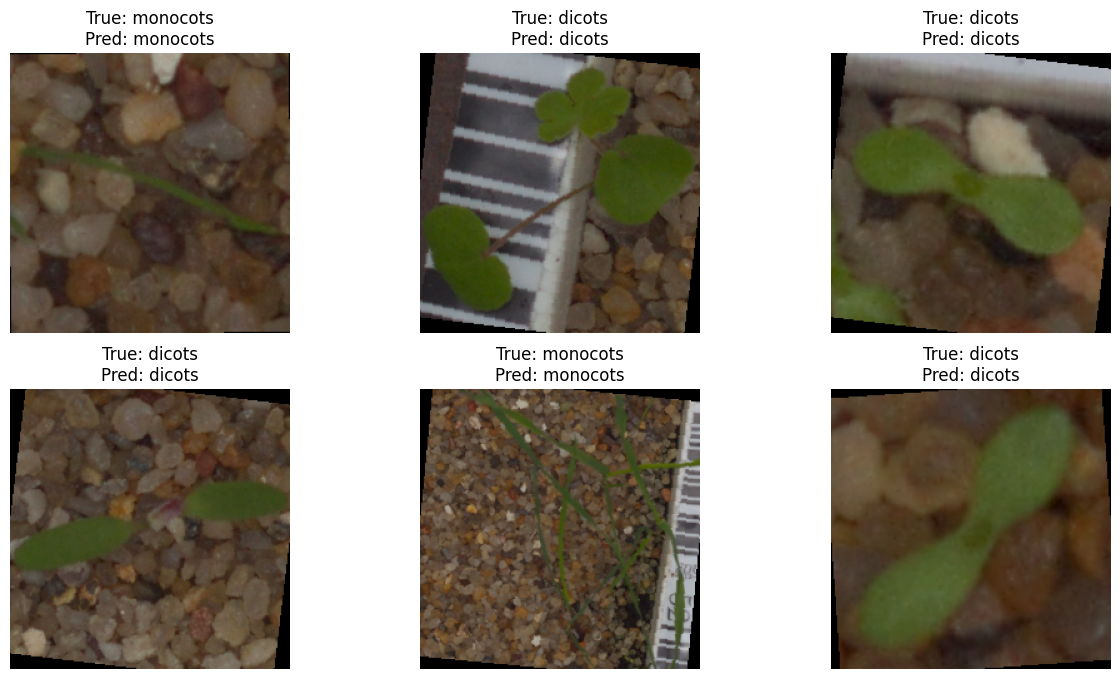

In [ ]:
# draw something to see
import matplotlib.pyplot as plt
import numpy as np
def imshow(img, title):
  img = img.cpu().numpy().transpose((1, 2, 0))
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  img = std * img + mean
  img = np.clip(img, 0, 1)
  plt.imshow(img)
  plt.title(title)
  plt.axis('off')
model.eval()
images, labels = next(iter(val_loader))
images = images.to(device)
outputs = model(images)
_, preds = torch.max(outputs, 1)
plt.figure(figsize=(15, 8))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)

    true_name = full_dataset.classes[labels[i]]
    pred_name = full_dataset.classes[preds[i]]
    color = "green" if true_name == pred_name else "red"
    title = f"True: {true_name}\nPred: {pred_name}"

    imshow(images[i], title)

plt.show()

In [ ]:
import os
import pandas as pd
from PIL import Image

test_dir = 'raw_data/test'
submission = []

model.eval()

class_names = full_dataset.classes
print(f"the model type and exp: {full_dataset.class_to_idx}")

test_files = os.listdir(test_dir)
test_files = [f for f in test_files if f.endswith(('.png', '.jpg', '.jpeg'))]
from tqdm import tqdm
loop = tqdm(test_files, desc='Predicting')
with torch.no_grad():
    for filename in loop:
        filepath = os.path.join(test_dir, filename)
        image = Image.open(filepath).convert('RGB')
        image_tensor = val_transform(image).unsqueeze(0)
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs, 1)
        predicted_class = class_names[predicted.item()]
        submission.append({'file': filename, 'species': predicted_class})

#output
df = pd.DataFrame(submission)
df.to_csv('my_submission.csv', index=False)

print(f"sucessfuly predicted {len(df)} images")
print("saved the file as 'my_submission.csv'")

the model type and exp: {'dicots': 0, 'monocots': 1}


Predicting: 100%|██████████| 794/794 [00:07<00:00, 100.70it/s]

sucessfuly predicted 794 images
saved the file as 'my_submission.csv'


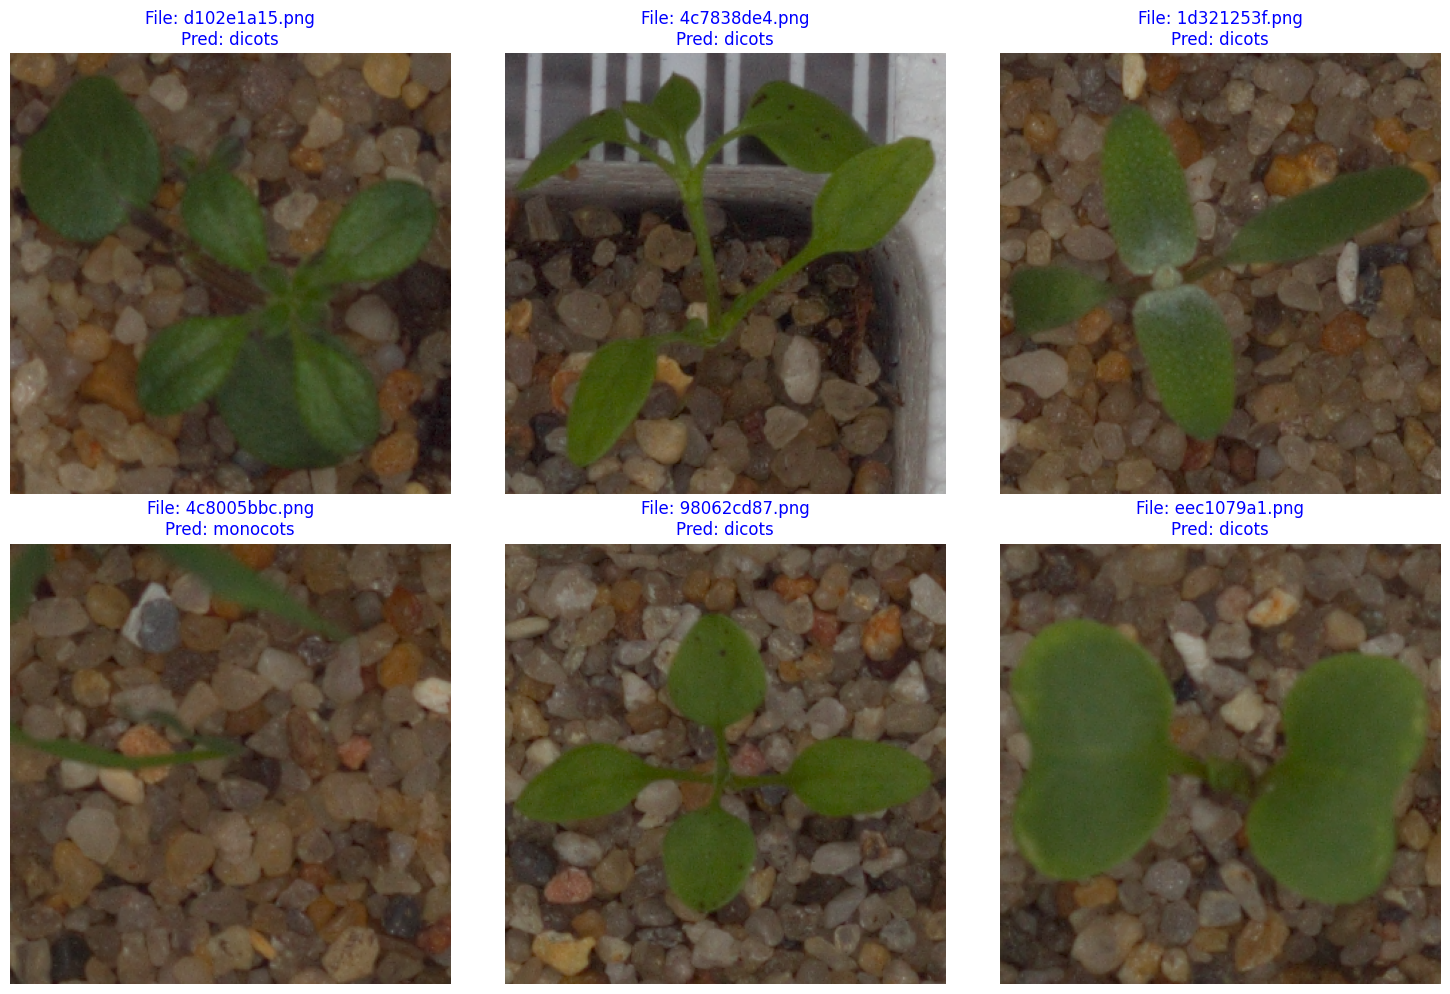

In [ ]:
#visualize validation data
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import random

df = pd.read_csv('my_submission.csv')


plt.figure(figsize=(15, 10))

random_samples = df.sample(n=6)

random_samples = random_samples.reset_index(drop=True)

test_dir = 'raw_data/test'

for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    filename = random_samples.loc[i, 'file']
    species = random_samples.loc[i, 'species']
    filepath = os.path.join(test_dir, filename)
    img = Image.open(filepath)
    plt.imshow(img)
    plt.title(f"File: {filename}\nPred: {species}", color='blue', fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()